In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import pickle
from functools import reduce
from dateutil.relativedelta import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
from helpers import load, plot, analyse

In [3]:
plot.ERC_Management().set_plot_params()
fig_width = 6.33

In [5]:
## Load data
start_date = '2023-03-04 01:00:00' #gut um nans zu zeigen
end_date = '2023-03-22 02:05:00'
data = load.load_data(start_date, end_date, masked=True, data_type='raw')

In [6]:
data = data.resample('300S').median()

Text(0.5, 1.0, 'Volume flow in March23 g-func period')

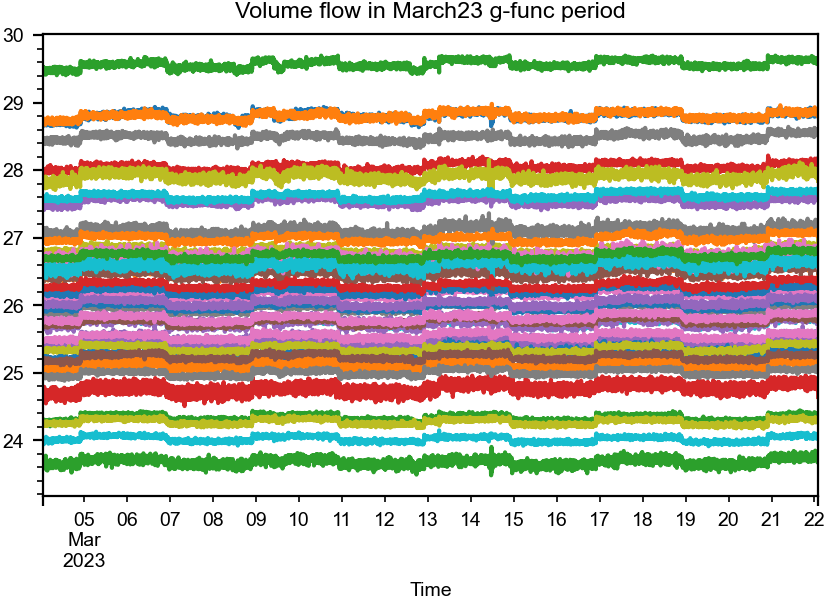

In [6]:
# look at volume flow
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=200)
data.filter(regex='Probe_[0-9]+_V').plot(ax=ax, legend=False)
plt.title('Volume flow in March23 g-func period')

In [7]:
filtered_data = data
colors = ['#89CFF0','#A52A2A', '#AFE1AF']

param_csv = pd.read_csv('Supplementary_BHE_Data.csv')
colordict = plot.get_colordict()

In [8]:
flow_rate = data.filter(regex='Probe_[0-9]+_V_').describe()
param_csv['flow_rate_mean'] = np.round(flow_rate.loc['mean'].values,2)
param_csv['flow_rate_min'] = np.round(flow_rate.loc['min'].values,2)
param_csv['flow_rate_max'] = np.round(flow_rate.loc['max'].values,2)

In [9]:
data_summary = pd.DataFrame()
data_summary.index = data.index 
m = plot.ERC_Management()
west_out, south_out, east_out = analyse.get_ID_strings(after='_V_dot')

data_summary['west_Vdot'] = data[west_out].mean(axis=1)
data_summary['west_Vdot_sd'] = data[west_out].std(axis=1)
data_summary['south_Vdot'] = data[south_out].mean(axis=1)
data_summary['south_Vdot_sd'] = data[south_out].std(axis=1)
data_summary['east_Vdot'] = data[east_out].mean(axis=1)
data_summary['east_Vdot_sd'] = data[east_out].std(axis=1)

C:\Users\Elisa\AppData\Local\Temp\ipykernel_7528\3488801582.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['29', '91', '117'])


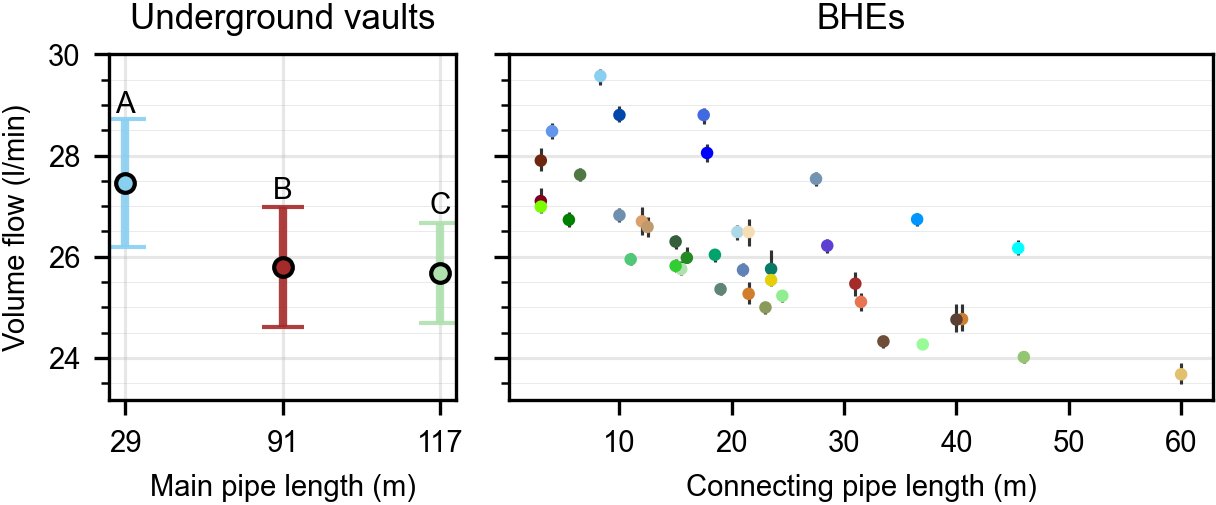

In [18]:
fig, ax = plt.subplots(1,2,figsize=(fig_width*0.75, 1.5), dpi=300, sharey=True, width_ratios=(0.33, 0.67))

stat = data_summary.describe()

y = stat.loc['mean', ['west_Vdot', 'south_Vdot', 'east_Vdot']].values
x = ['West', 'South', 'East']
yerr = stat.loc['mean', ['west_Vdot_sd', 'south_Vdot_sd', 'east_Vdot_sd']].values

for i in range(len(y)):
    ax[0].errorbar(x[i], y[i], yerr=yerr[i], linestyle=None, fmt='-', color='k', ecolor=colors[i], elinewidth=2, capsize=5, alpha=.9)
    ax[0].scatter(x[i], y[i], facecolor=colors[i], edgecolor='k', zorder=100, s=20)

#ax[0].set_xticks([1,2,3])
ax[0].set_xticklabels(['29', '91', '117'])

ax[0].set_title('Underground vaults')
ax[0].set_ylabel('Volume flow (l/min)')
ax[0].set_xlabel('Main pipe length (m)')
ax[0].grid(which='minor', linewidth=.2, alpha=.3)
ax[0].grid(which='major', linewidth=.75, alpha=.3)
ax[0].annotate('A', xy = [0,29], va='center', ha='center', fontsize=7.1,zorder=1001)#,bbox=dict(facecolor='white', alpha=.8, edgecolor=None, boxstyle='square'))
ax[0].annotate('B', xy = [1,27.3], va='center', ha='center', fontsize=7.1,zorder=1001)#,bbox=dict(facecolor='white', alpha=.8, edgecolor=None, boxstyle='square'))
ax[0].annotate('C', xy = [2,27], va='center', ha='center', fontsize=7.1,zorder=1001)#,bbox=dict(facecolor='white', alpha=.8, edgecolor=None, boxstyle='square'))

yerrors = np.array([param_csv[['flow_rate_min']].mean(axis=1).values, param_csv[['flow_rate_max']].mean(axis=1).values])
ax[1].vlines(param_csv['Pipelength'], yerrors[0], yerrors[1], color='k', alpha=.8, zorder=10, lw=0.75)
ax[1].scatter(param_csv['Pipelength'], param_csv['flow_rate_mean'], color=list(colordict.values()), s=4, zorder=11)
ax[1].set_title('BHEs')
ax[1].set_xlabel('Connecting pipe length (m)')
ax[1].grid(which='minor', linewidth=.2, axis='y', alpha=.3)
ax[1].grid(which='major', linewidth=.75, axis='y', alpha=.3)

#ax[1].set_ylim(20,30)

fig.subplots_adjust(wspace=0.1)

plt.savefig('Validate_Vdot.pdf', dpi=300, bbox_inches='tight')